# Compare future temperature pathways from KNMI14, CMIP5 and CMIP6

### Start with developping the functions for CMIP6

In [1]:
import os
import pandas as pd
import xarray as xr

/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
data_path = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
data_cmip6_temp = data_path+'Data_CMIP6/tas-global-area-averaged/'

#MOD = []

In [3]:
ens = 'r1i1p1f1'
exp = 'ssp126'
files = os.listdir(data_cmip6_temp)
# for file in files:
#     print(file)
print(len(files))
files.remove('README')
files = sorted(files)
info_df = pd.DataFrame(columns=['Model', 'Experiment', 'Ensemble'])
for i in range(len(files)):
    st = files[i].split('_')
    if len(st) != 3:
        print(i)
        print(st)
    #st = list(filter(None, st)) # Remove empty '' strings
    info_df.loc[i] = [ st[0], st[1], st[2] ]
info_df[info_df['Ensemble'] == ens+'.nc'][info_df['Experiment'] == exp]


615


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Model,Experiment,Ensemble
5,AWI-CM-1-1-MR,ssp126,r1i1p1f1.nc
16,BCC-CSM2-MR,ssp126,r1i1p1f1.nc
29,CAMS-CSM1-0,ssp126,r1i1p1f1.nc
42,CESM2-WACCM,ssp126,r1i1p1f1.nc
59,CESM2,ssp126,r1i1p1f1.nc
138,CanESM5,ssp126,r1i1p1f1.nc
327,EC-Earth3-Veg,ssp126,r1i1p1f1.nc
360,EC-Earth3,ssp126,r1i1p1f1.nc
445,INM-CM4-8,ssp126,r1i1p1f1.nc
457,INM-CM5-0,ssp126,r1i1p1f1.nc


In [4]:
set(info_df['Model'])

{'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CanESM5',
 'E3SM-1-0',
 'EC-Earth3',
 'EC-Earth3-Veg',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'GISS-E2-1-G-CC',
 'GISS-E2-1-H',
 'HadGEM3-GC31-LL',
 'INM-CM4-8',
 'INM-CM5-0',
 'MCM-UA-1-0',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MRI-ESM2-0',
 'NESM3',
 'NorCPM1',
 'NorESM2-LM',
 'SAM0-UNICON',
 'UKESM1-0-LL'}

In [5]:
len(set(info_df['Model']))

29

In [6]:
def temp_path_CMIP6(DIR_T, ENS, SCE):
    '''Build a list of paths of the CMIP6 global mean tas files refering to a 
    given ensemble and scenario'''
    files_all = os.listdir(DIR_T)
    files_all.remove('README')
    info_df = pd.DataFrame(columns=['Model', 'Experiment', 'Ensemble'])
    for i in range(len(files_all)):
        st = files_all[i].split('_')
        if len(st) != 3:
            print('WARNING!!! This file name is not standard')
            print(i)
            print(st)
        info_df.loc[i] = [ st[0], st[1], st[2] ]
    sel_df = info_df[info_df['Ensemble'] == ENS+'.nc'][info_df['Experiment'] 
                                                       == SCE]
    files     = []
    nb_MOD = len(sel_df)
    for m in range(0, nb_MOD-1):
        path = DIR_T+sel_df.iloc[m][0]+'_'+sel_df.iloc[m][1]+'_'+sel_df.iloc[m][2]
        if path: # Make sure the path is not empty
            files.append(path)
    return files

In [7]:
path_sel = temp_path_CMIP6(data_cmip6_temp, ens, exp)
path_sel

/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


['/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/CAMS-CSM1-0_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/CESM2_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/MPI-ESM1-2-HR_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/MIROC6_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/MRI-ESM2-0_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/EC-Earth3-Veg_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/AWI-CM-1-1-MR_ssp126_r1i1p1f1.nc',
 '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_CMIP6/tas-global-area-averaged/BCC-CSM2-MR_ssp126_r1i1p1f1.nc',
 '/Users/dewil

In [37]:
def tglob_cmip6(INFO, DIR_T, SCE, nb_y, start_date, ye):
    '''Read the NetCDF files of monthly temperature for each CMIP6 model and 
    store yearly averged values in and array'''
    files_all = os.listdir(DIR_T)
    files_all.remove('README')
    info_df = pd.DataFrame(columns=['Model', 'Experiment', 'Ensemble'])
    for i in range(len(files_all)):
        st = files_all[i].split('_')
        if len(st) != 3:
            print('WARNING!!! This file name is not standard')
            print(i)
            print(st)
        info_df.loc[i] = [ st[0], st[1], st[2] ]
    sel_df = info_df[info_df['Ensemble'] == ENS+'.nc'][info_df['Experiment'] 
                                                       == SCE]
    nb_MOD    = len(sel_df)
    if INFO:
        print('Number of models used for scenario '+ SCE + ' : ' + str(nb_MOD))
        print('Models path: ')
        print("\n".join(files))
    
    TGLOB    = np.zeros([nb_MOD, nb_y])

    for m in range(0,nb_MOD):
        TEMP_ds  = xr.open_dataset(files[m])
        TEMP_y_ds = TEMP_ds.groupby('year').mean(dim='time')
        
        time     = TEMP['Year'][:]
        dim_t    = len(time)
        i_start  = np.where(time == start_date)[0][0]
        i_end    = np.where(time == ye)[0][0]
        TGLOB[m, :i_end + 1 - i_start] = TEMP.iloc[i_start:i_end+1, 1:].mean(axis=1)   
        # !Data is in degree Kelvin
        #### Issue of missing temperature value for rcp26 after 2100 for this scenario
        # it is ok to assume it is constant after 2100
        if (SCE == 'rcp26') and (ye > 2100):
            i2100 = np.where(time == 2099)
            print(i2100)
            TGLOB[m,i2100-i_start : ] = TGLOB[m,i2100-i_start]
        del(TEMP)
        del(time)
    return TGLOB

'AWI-CM-1-1-MR'

In [50]:
info_df.loc[0][0]

'AWI-CM-1-1-MR'

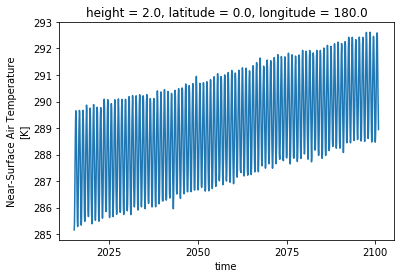

In [9]:
tas_test = xr.open_dataset(data_cmip6_temp+'INM-CM4-8_ssp585_r1i1p1f1.nc')
tas_test.tas.plot()

In [12]:
tas_test.year

<xarray.DataArray 'year' (time: 1032)>
array([2015, 2015, 2015, ..., 2100, 2100, 2100])
Coordinates:
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    height       float64 ...
    latitude     float64 ...
    longitude    float64 ...
    season       (time) |S64 ...
    season_year  (time) int64 ...
    year         (time) int64 2015 2015 2015 2015 2015 ... 2100 2100 2100 2100
Attributes:
    units:      1
    long_name:  year

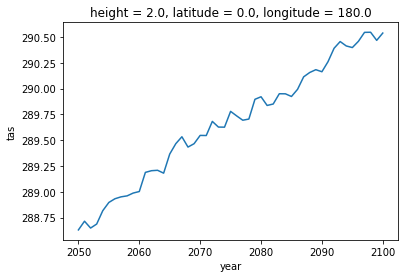

In [24]:
tas_y = tas_test.groupby('year').mean(dim='time')
tas_y.tas.loc[2050:2100].plot()

In [23]:
tas_y.loc[]

<xarray.Dataset>
Dimensions:         (bnds: 2, year: 86)
Coordinates:
    height          float64 2.0
    latitude        float64 0.0
    longitude       float64 180.0
  * year            (year) int64 2015 2016 2017 2018 ... 2097 2098 2099 2100
Dimensions without coordinates: bnds
Data variables:
    tas             (year) float64 287.4 287.5 287.5 287.6 ... 290.5 290.5 290.5
    latitude_bnds   (year, bnds) float64 -90.0 90.0 -90.0 ... 90.0 -90.0 90.0
    longitude_bnds  (year, bnds) float64 0.0 360.0 0.0 360.0 ... 360.0 0.0 360.0

In [26]:
tas_y.year.loc[2050:2100]

<xarray.DataArray 'year' (year: 51)>
array([2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061,
       2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073,
       2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085,
       2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097,
       2098, 2099, 2100])
Coordinates:
    height     float64 2.0
    latitude   float64 0.0
    longitude  float64 180.0
  * year       (year) int64 2050 2051 2052 2053 2054 ... 2097 2098 2099 2100